In [1]:
from sys import stdout
import pandas as pd
import rasterio.plot
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
print("BE CAREFULL warning are masked !!")

BE CAREFULL warning are masked !!


In [2]:

EnMAP_80_grad = pd.read_csv('images/out/df_EnMAP_masked_gradient_80perc.csv')
EnMAP_20_grad = pd.read_csv('images/out/df_EnMAP_masked_gradient_20perc.csv')


EnMAP_80_smoothed = pd.read_csv('images/out/df_EnMAP_masked_smoothed_80perc.csv')
EnMAP_20_smoothed = pd.read_csv('images/out/df_EnMAP_masked_smoothed_20perc.csv')

EnMAP_80_raw = pd.read_csv('images/out/df_EnMAP_raw_masked_clean_80perc.csv')
EnMAP_20_raw = pd.read_csv('images/out/df_EnMAP_raw_masked_clean_20perc.csv')

S2_80 = pd.read_csv('images/out/df_S2_raw_masked_clean_80perc.csv')
S2_20 = pd.read_csv('images/out/df_S2_raw_masked_clean_20perc.csv')


plots_80 = pd.read_csv('images/out/df_plots_raw_masked_clean_80perc.csv')
plots_20 = pd.read_csv('images/out/df_plots_id_masked_20perc.csv')


In [3]:
S2_80

,id,490,560,665,705,740,783,842,865,1375,1610
0,342331,0.0241,0.0499,0.0337,0.0875,0.2775,0.3483,0.3748,0.3726,0.1433,0.0718
1,342332,0.0240,0.0492,0.0329,0.0835,0.2784,0.3513,0.3783,0.3755,0.1389,0.0672
2,342333,0.0234,0.0475,0.0319,0.0823,0.2777,0.3511,0.3786,0.3750,0.1375,0.0664
3,343606,0.0242,0.0498,0.0362,0.0915,0.2671,0.3315,0.3467,0.3553,0.1464,0.0770
4,351229,0.0155,0.0313,0.0220,0.0625,0.2159,0.2833,0.2820,0.3038,0.1139,0.0567
...,...,...,...,...,...,...,...,...,...,...,...
15304,1575302,0.0214,0.0434,0.0255,0.0825,0.2699,0.3368,0.3474,0.3513,0.1309,0.0662
15305,1575303,0.0222,0.0439,0.0257,0.0834,0.2731,0.3415,0.3520,0.3561,0.1323,0.0671
15306,1575304,0.0232,0.0453,0.0263,0.0855,0.2834,0.3559,0.3620,0.3710,0.1366,0.0691
15307,1575354,0.0250,0.0482,0.0304,0.0836,0.2485,0.2978,0.3073,0.3108,0.1268,0.0617


In [4]:
EnMAP_80_grad

,id,418.416,424.043,429.457,434.686,439.758,444.699,449.539,454.306,459.031,...,2376.95,2384.66,2392.34,2400.0,2407.62,2415.21,2422.78,2430.32,2437.82,2445.3
0,342331.0,0.000006,0.000203,4.806007e-04,0.000698,0.000963,0.001037,0.000824,0.000588,0.000498,...,-0.001580,-0.001010,-0.000876,-0.001581,-0.002091,-0.002253,-0.002938,-0.003140,-0.002681,-0.002376
1,342332.0,0.000306,0.000395,5.182635e-04,0.000651,0.000894,0.000990,0.000782,0.000520,0.000451,...,-0.000616,-0.001115,-0.002115,-0.002591,-0.002199,-0.002269,-0.003448,-0.003995,-0.004264,-0.004472
2,342333.0,-0.000305,-0.000109,1.823200e-04,0.000437,0.000753,0.000952,0.000813,0.000509,0.000407,...,-0.000566,-0.000431,-0.001529,-0.002345,-0.002192,-0.002288,-0.003651,-0.004357,-0.004240,-0.004219
3,343606.0,0.000215,0.000343,5.413716e-04,0.000711,0.000874,0.000897,0.000766,0.000637,0.000637,...,-0.001247,-0.000885,-0.001220,-0.001465,-0.001278,-0.001806,-0.003857,-0.005068,-0.005281,-0.005362
4,351229.0,0.000347,0.000540,7.874605e-04,0.000886,0.000923,0.000928,0.000710,0.000484,0.000560,...,-0.000529,-0.000817,-0.001637,-0.002376,-0.002669,-0.002538,-0.002932,-0.003182,-0.003069,-0.003038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15304,1575302.0,-0.000161,-0.000094,8.763283e-06,0.000056,0.000172,0.000375,0.000361,0.000130,0.000072,...,-0.001059,-0.001150,-0.001765,-0.002387,-0.002409,-0.002643,-0.003454,-0.003782,-0.003525,-0.003318
15305,1575303.0,-0.000379,-0.000321,-1.785612e-04,0.000053,0.000327,0.000524,0.000456,0.000137,-0.000062,...,-0.001427,-0.000935,-0.000754,-0.001199,-0.001747,-0.002689,-0.004192,-0.004697,-0.004148,-0.003722
15306,1575304.0,-0.000072,-0.000048,2.611246e-07,0.000087,0.000214,0.000334,0.000324,0.000116,0.000010,...,-0.001645,-0.001536,-0.001373,-0.001634,-0.001856,-0.002221,-0.003199,-0.003899,-0.003791,-0.003481
15307,1575354.0,0.000789,0.000794,8.336840e-04,0.000853,0.000814,0.000748,0.000523,0.000102,-0.000087,...,-0.001267,-0.001700,-0.002013,-0.002028,-0.001992,-0.002344,-0.002993,-0.003162,-0.002716,-0.002411


In [5]:
classes_names = ['froment', 'orge', 'epautre', 'triticale', 'avoine']
classes_names_en = ['Wheat', 'Barley', 'Spelt', 'Triticale', 'Oat']
code_names = ['311', '321', '36', '351', '341']

In [6]:
DF_train_S2 = pd.merge(S2_80, plots_80[['plots', 'id']], on = 'id')
DF_train_S2 = DF_train_S2.dropna(axis=1, how='all')
X_train_S2 = DF_train_S2.drop(['plots', 'id'], axis = 1)
y_train_S2 = DF_train_S2['plots']

DF_test_S2 = pd.merge(S2_20, plots_20[['plots', 'id']], on = 'id')
DF_test_S2 = DF_test_S2.dropna(axis=1, how='all')
X_test_S2 = DF_test_S2.drop(['plots', 'id'], axis = 1)
y_test_S2 = DF_test_S2['plots']




In [7]:
rfr_S2 = RandomForestClassifier(random_state=1,n_estimators=500, max_depth= 7, max_features= 'log2', max_leaf_nodes=7,  bootstrap= True, oob_score= True)

rfr_S2.fit(X_train_S2, y_train_S2)
# get the best performing model fit on the whole training set

pred_S2 = rfr_S2.predict(X_test_S2)

f1_S2 = f1_score(y_test_S2, pred_S2, average='weighted')

acc_metrics_dict_S2 = classification_report(y_test_S2, pred_S2,target_names=classes_names_en,labels=code_names, output_dict=True)


In [8]:
label = [311, 321, 36, 351, 341]
cm_S2 = confusion_matrix(y_test_S2, pred_S2, labels=label)

# Convert CM in dataframe
cm_df_S2 = pd.DataFrame(cm_S2)

cm_df_S2.columns = label
cm_df_S2.index = label

# Export CM in a CSV file
#cm_df.to_csv(cm_csv, index=True, sep=';')

display(cm_df_S2)

,311,321,36,351,341
311,3316,26,0,0,0
321,132,340,0,0,0
36,7,4,0,0,0
351,5,0,0,0,0
341,7,0,0,0,0


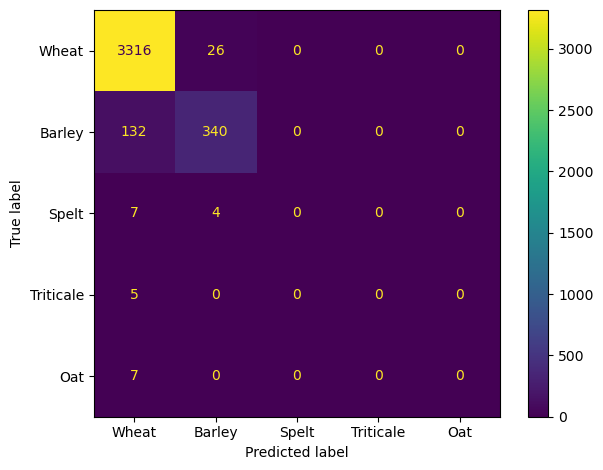

In [9]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_S2,
                              display_labels=classes_names_en)
disp.plot()
plt.tight_layout()
plt.savefig('images/out/cm_S2.png')

In [10]:
acc_metrics_str  = classification_report(y_test_S2,
                                         pred_S2,
                                         target_names=classes_names,
                                         labels=code_names,
                                         digits=3)

print(acc_metrics_str)

              precision    recall  f1-score   support

     froment      0.956     0.992     0.974      3342
        orge      0.919     0.720     0.808       472
     epautre      0.000     0.000     0.000        11
   triticale      0.000     0.000     0.000         5
      avoine      0.000     0.000     0.000         7

   micro avg      0.953     0.953     0.953      3837
   macro avg      0.375     0.343     0.356      3837
weighted avg      0.946     0.953     0.948      3837



In [11]:
DF_train_EnMAP = pd.merge(EnMAP_80_grad, plots_80[['plots', 'id']], on = 'id')
DF_train_EnMAP = DF_train_EnMAP.dropna(axis=1, how='all')
X_train_EnMAP = DF_train_EnMAP.drop(['plots', 'id'], axis = 1)
y_train_EnMAP = DF_train_EnMAP['plots']

DF_test_EnMAP = pd.merge(EnMAP_20_grad, plots_20[['plots', 'id']], on = 'id')
DF_test_EnMAP = DF_test_EnMAP.dropna(axis=1, how='all')
X_test_EnMAP = DF_test_EnMAP.drop(['plots', 'id'], axis = 1)
y_test_EnMAP = DF_test_EnMAP['plots']


classes_names = ['froment', 'orge', 'epautre', 'triticale', 'avoine']
code_names = ['311', '321', '36', '351', '341']

In [12]:
rfr_EnMAP = RandomForestClassifier(random_state=1,n_estimators=500, max_depth= 5, max_features= 'sqrt', max_leaf_nodes=9,  bootstrap= True, oob_score= True)

rfr_EnMAP.fit(X_train_EnMAP, y_train_EnMAP)
# get the best performing model fit on the whole training set

pred_EnMAP = rfr_EnMAP.predict(X_test_EnMAP)

f1_EnMAP_grad = f1_score(y_test_EnMAP, pred_EnMAP, average='weighted')

acc_metrics_dict_ENMAP = classification_report(y_test_EnMAP, pred_EnMAP,target_names=classes_names_en,labels=code_names, output_dict=True)

In [13]:
label = [311, 321, 36, 351, 341]
cm_EnMAP = confusion_matrix(y_test_EnMAP, pred_EnMAP, labels=label)

# Convert CM in dataframe
cm_df_EnMAP = pd.DataFrame(cm_EnMAP)

cm_df_EnMAP.columns = label
cm_df_EnMAP.index = label

# Export CM in a CSV file
#cm_df.to_csv(cm_csv, index=True, sep=';')

display(cm_df_EnMAP)

,311,321,36,351,341
311,3329,13,0,0,0
321,173,299,0,0,0
36,9,2,0,0,0
351,5,0,0,0,0
341,7,0,0,0,0


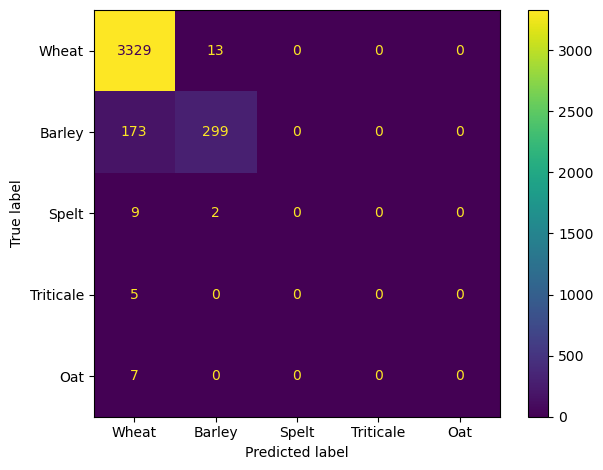

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_EnMAP,
                              display_labels=classes_names_en)
disp.plot()
plt.tight_layout()
plt.savefig('images/out/cm_EnMAP.png')

In [15]:
acc_metrics_str  = classification_report(y_test_EnMAP,
                                         pred_EnMAP,
                                         target_names=classes_names,
                                         labels=code_names,
                                         digits=3)

print(acc_metrics_str)

              precision    recall  f1-score   support

     froment      0.945     0.996     0.970      3342
        orge      0.952     0.633     0.761       472
     epautre      0.000     0.000     0.000        11
   triticale      0.000     0.000     0.000         5
      avoine      0.000     0.000     0.000         7

   micro avg      0.946     0.946     0.946      3837
   macro avg      0.379     0.326     0.346      3837
weighted avg      0.940     0.946     0.938      3837



## Plot f1 scores

In [16]:
f1_scores_EnMAP = f1_score(y_test_EnMAP, pred_EnMAP, average=None, labels=code_names)
f1_scores_S2 = f1_score(y_test_S2, pred_S2, average=None, labels=code_names)

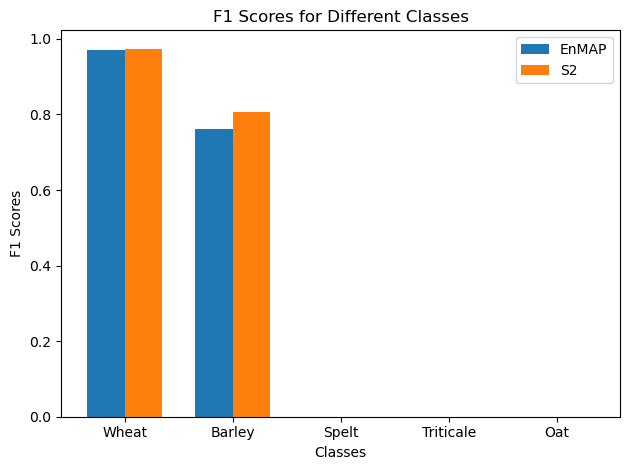

In [17]:


bar_width = 0.35
index = np.arange(len(classes_names_en))

plt.bar(index, f1_scores_EnMAP, bar_width, label='EnMAP')
plt.bar(index + bar_width, f1_scores_S2, bar_width, label='S2')

plt.xlabel('Classes')
plt.ylabel('F1 Scores')
plt.title('F1 Scores for Different Classes')
plt.xticks(index + bar_width / 2, classes_names_en)
plt.legend()

plt.tight_layout()

plt.savefig('images/out/f1s.png')

plt.show()



## EnMAP raw

In [12]:
DF_train_EnMAP = pd.merge(EnMAP_80_raw, plots_80[['plots', 'id']], on = 'id')
DF_train_EnMAP = DF_train_EnMAP.dropna(axis=1, how='all')
X_train_EnMAP = DF_train_EnMAP.drop(['plots', 'id'], axis = 1)
y_train_EnMAP = DF_train_EnMAP['plots']

DF_test_EnMAP = pd.merge(EnMAP_20_raw, plots_20[['plots', 'id']], on = 'id')
DF_test_EnMAP = DF_test_EnMAP.dropna(axis=1, how='all')
X_test_EnMAP = DF_test_EnMAP.drop(['plots', 'id'], axis = 1)
y_test_EnMAP = DF_test_EnMAP['plots']


classes_names = ['froment', 'orge', 'epautre', 'triticale', 'avoine']
code_names = ['311', '321', '36', '351', '341']

In [13]:
rfr_EnMAP = RandomForestClassifier(random_state=1,n_estimators=500, max_depth= 7, max_features= 'sqrt', max_leaf_nodes=9,  bootstrap= True, oob_score= True)

rfr_EnMAP.fit(X_train_EnMAP, y_train_EnMAP)
# get the best performing model fit on the whole training set

pred_EnMAP = rfr_EnMAP.predict(X_test_EnMAP)

f1_EnMAP_raw = f1_score(y_test_EnMAP, pred_EnMAP, average='weighted')

acc_metrics_dict_ENMAP_raw = classification_report(y_test_EnMAP, pred_EnMAP,target_names=classes_names,labels=code_names, output_dict=True)

In [14]:
label = [311, 321, 36, 351, 341]
cm_EnMAP = confusion_matrix(y_test_EnMAP, pred_EnMAP, labels=label)

# Convert CM in dataframe
cm_df_EnMAP = pd.DataFrame(cm_EnMAP)

cm_df_EnMAP.columns = label
cm_df_EnMAP.index = label

# Export CM in a CSV file
#cm_df.to_csv(cm_csv, index=True, sep=';')

display(cm_df_EnMAP)

,311,321,36,351,341
311,3073,269,0,0,0
321,149,323,0,0,0
36,8,3,0,0,0
351,5,0,0,0,0
341,7,0,0,0,0


## EnMAP smoothed

In [15]:
DF_train_EnMAP = pd.merge(EnMAP_80_smoothed, plots_80[['plots', 'id']], on = 'id')
DF_train_EnMAP = DF_train_EnMAP.dropna(axis=1, how='all')
X_train_EnMAP = DF_train_EnMAP.drop(['plots', 'id'], axis = 1)
y_train_EnMAP = DF_train_EnMAP['plots']

DF_test_EnMAP = pd.merge(EnMAP_20_smoothed, plots_20[['plots', 'id']], on = 'id')
DF_test_EnMAP = DF_test_EnMAP.dropna(axis=1, how='all')
X_test_EnMAP = DF_test_EnMAP.drop(['plots', 'id'], axis = 1)
y_test_EnMAP = DF_test_EnMAP['plots']


classes_names = ['froment', 'orge', 'epautre', 'triticale', 'avoine']
code_names = ['311', '321', '36', '351', '341']

In [16]:
rfr_EnMAP = RandomForestClassifier(random_state=1,n_estimators=500, max_depth= 7, max_features= 'sqrt', max_leaf_nodes=9,  bootstrap= True, oob_score= True)

rfr_EnMAP.fit(X_train_EnMAP, y_train_EnMAP)
# get the best performing model fit on the whole training set

pred_EnMAP = rfr_EnMAP.predict(X_test_EnMAP)

f1_EnMAP_smoothed = f1_score(y_test_EnMAP, pred_EnMAP, average='weighted')

acc_metrics_dict_ENMAP_smoothed = classification_report(y_test_EnMAP, pred_EnMAP,target_names=classes_names,labels=code_names, output_dict=True)

In [17]:
label = [311, 321, 36, 351, 341]
cm_EnMAP = confusion_matrix(y_test_EnMAP, pred_EnMAP, labels=label)

# Convert CM in dataframe
cm_df_EnMAP = pd.DataFrame(cm_EnMAP)

cm_df_EnMAP.columns = label
cm_df_EnMAP.index = label

# Export CM in a CSV file
#cm_df.to_csv(cm_csv, index=True, sep=';')

display(cm_df_EnMAP)

,311,321,36,351,341
311,3049,293,0,0,0
321,148,324,0,0,0
36,8,3,0,0,0
351,5,0,0,0,0
341,7,0,0,0,0
